## Add cancer analysis

description goes here

TODO:
* put results into context (see below)
* average similarity vs. change in performance (higher similarity = more performance improvement?)

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

In [2]:
RESULTS_DIR = os.path.join(cfg.repo_root, 'add_cancer_results', 'add_cancer')

In [3]:
add_cancer_df = au.load_add_cancer_results(RESULTS_DIR, load_cancer_types=True)
print(add_cancer_df.shape)
add_cancer_df.sort_values(by=['gene', 'holdout_cancer_type']).head(n=10)

(4308, 12)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,num_train_cancer_types,how_to_add,identifier,train_cancer_types
0,0.98128,0.96627,BRAF,COAD,signal,42,train,0,2,similarity,BRAF_COAD,UCEC COAD THCA
1,0.74925,0.44968,BRAF,COAD,signal,42,test,0,2,similarity,BRAF_COAD,UCEC COAD THCA
2,0.93750,0.89993,BRAF,COAD,signal,42,cv,0,2,similarity,BRAF_COAD,UCEC COAD THCA
3,0.98493,0.97138,BRAF,COAD,signal,42,train,1,2,similarity,BRAF_COAD,UCEC COAD THCA
4,0.64394,0.45539,BRAF,COAD,signal,42,test,1,2,similarity,BRAF_COAD,UCEC COAD THCA
5,0.94046,0.90884,BRAF,COAD,signal,42,cv,1,2,similarity,BRAF_COAD,UCEC COAD THCA
6,0.98633,0.97349,BRAF,COAD,signal,42,train,2,2,similarity,BRAF_COAD,UCEC COAD THCA
7,0.81250,0.48397,BRAF,COAD,signal,42,test,2,2,similarity,BRAF_COAD,UCEC COAD THCA
8,0.93845,0.90846,BRAF,COAD,signal,42,cv,2,2,similarity,BRAF_COAD,UCEC COAD THCA
9,0.98580,0.97297,BRAF,COAD,signal,42,train,3,2,similarity,BRAF_COAD,UCEC COAD THCA


Text(0, 0.5, 'AUPR')

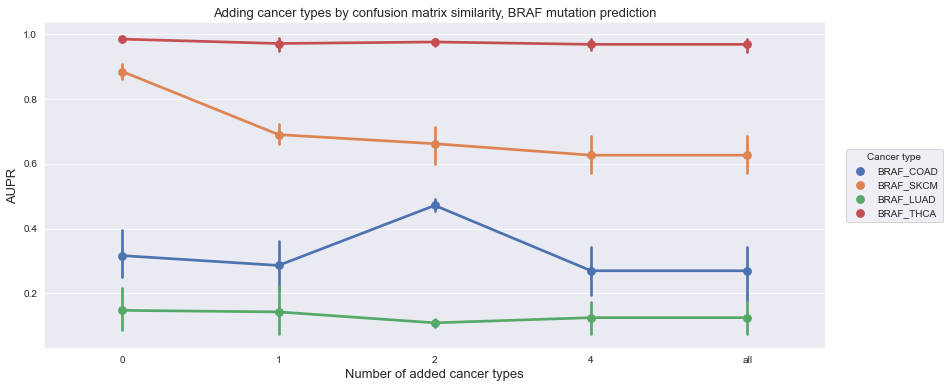

In [4]:
gene = 'BRAF'
gene_df = add_cancer_df[(add_cancer_df.gene == gene) &
                        (add_cancer_df.data_type == 'test') &
                        (add_cancer_df.signal == 'signal')].copy()

# make seaborn treat x axis as categorical
gene_df.num_train_cancer_types = gene_df.num_train_cancer_types.astype(str)
gene_df.loc[(gene_df.num_train_cancer_types == '-1'), 'num_train_cancer_types'] = 'all'

sns.set({'figure.figsize': (14, 6)})
sns.pointplot(data=gene_df, x='num_train_cancer_types', y='aupr', hue='identifier',
              order=['0', '1', '2', '4', 'all'])
plt.legend(bbox_to_anchor=(1.15, 0.5), loc='center right', borderaxespad=0., title='Cancer type')
plt.title('Adding cancer types by confusion matrix similarity, {} mutation prediction'.format(gene), size=13)
plt.xlabel('Number of added cancer types', size=13)
plt.ylabel('AUPR', size=13)

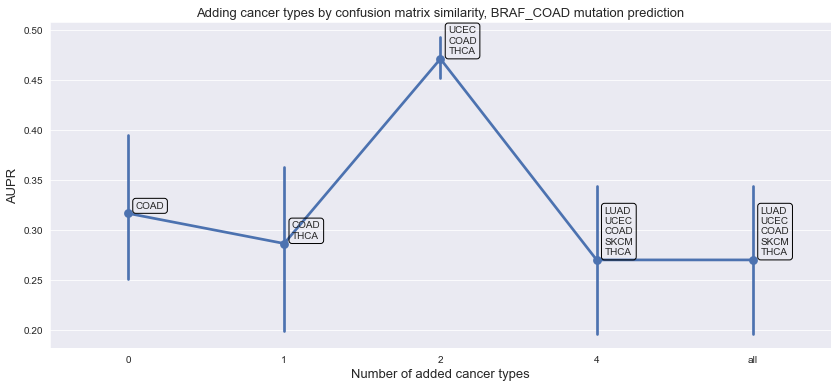

In [5]:
identifier = 'BRAF_COAD'
# identifier = 'EGFR_ESCA'
# identifier = 'EGFR_LGG'
# identifier = 'KRAS_CESC'
# identifier = 'PIK3CA_ESCA'
# identifier = 'PIK3CA_STAD'
# identifier = 'PTEN_COAD'

id_df = add_cancer_df[(add_cancer_df.identifier == identifier) &
                      (add_cancer_df.data_type == 'test') &
                      (add_cancer_df.signal == 'signal')].copy()

# make seaborn treat x axis as categorical
id_df.num_train_cancer_types = id_df.num_train_cancer_types.astype(str)
id_df.loc[(id_df.num_train_cancer_types == '-1'), 'num_train_cancer_types'] = 'all'

sns.set({'figure.figsize': (14, 6)})
cat_order = ['0', '1', '2', '4', 'all']
sns.pointplot(data=id_df, x='num_train_cancer_types', y='aupr', hue='identifier',
              order=cat_order)
plt.legend([],[], frameon=False)
plt.title('Adding cancer types by confusion matrix similarity, {} mutation prediction'.format(identifier),
          size=13)
plt.xlabel('Number of added cancer types', size=13)
plt.ylabel('AUPR', size=13)

# annotate points with cancer types
def label_points(x, y, cancer_types, ax):
    a = pd.DataFrame({'x': x, 'y': y, 'cancer_types': cancer_types})
    for i, point in a.iterrows():
        ax.text(point['x']+0.05,
                point['y']+0.005,
                str(point['cancer_types'].replace(' ', '\n')),
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

cat_to_loc = {c: i for i, c in enumerate(cat_order)}
group_id_df = (
    id_df.groupby(['num_train_cancer_types', 'train_cancer_types'])
         .mean()
         .reset_index()
)
label_points([cat_to_loc[c] for c in group_id_df.num_train_cancer_types],
              group_id_df.aupr, group_id_df.train_cancer_types, plt.gca())

In [6]:
# what we need is a way to take interesting examples and put them into context with our previous experiments
# i.e. for a particular identifier with an interesting pattern:
# - is it significantly better than shuffled single-cancer? pan-cancer?
# - where is it in our single vs. pan-cancer volcano plot? "trending toward significance" or nowhere near?